PCA on IRIS dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [12]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)



In [13]:
x[1] ## just one example of the features: sepal length, sepal width, petal length, and petal width

array([-1.14301691, -0.1249576 , -1.3412724 , -1.31297673])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) ## transforming the data into PC coordinates.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

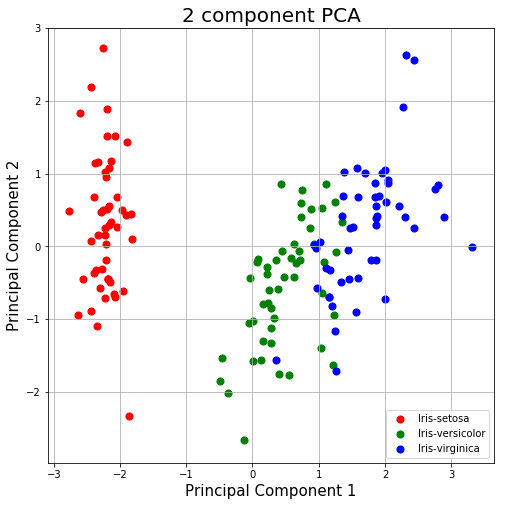

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Word2Vec

In [7]:
from gensim.models import Word2Vec ### gensim is text modeling library in python - https://pypi.org/project/gensim/
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)

In [10]:
print(model)

# Size refers to the dimension of the dense vector that is used to represent each word.
# Alpha is a parameter of an internal algorithm used in gensim package (https://stackoverflow.com/questions/53815402/value-of-alpha-in-gensim-word-embedding-word2vec-and-fasttext-models)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [9]:
print(model['sentence'])


[ 2.4850357e-03 -2.7836503e-03 -2.1972102e-03  3.6662456e-03
  2.7844720e-04  1.6567048e-04  7.5183267e-04  1.0815326e-03
 -4.5256340e-03 -4.7082696e-03 -1.4496031e-03 -7.1663782e-04
  4.5231772e-03 -1.3271503e-03  4.0758253e-04 -7.8734756e-04
  2.9391153e-03  3.3678899e-03  1.3548627e-03 -4.3241140e-03
 -3.6298828e-03  3.0306431e-03  1.8345094e-03 -2.5968153e-03
 -3.9125849e-03  2.4807558e-03 -4.6531297e-04  4.5197769e-03
  4.9726595e-03  1.3602386e-03  4.5611016e-03  4.0292749e-03
  4.0784790e-03 -4.1512279e-03  3.8302417e-03 -8.6300097e-05
 -2.5544968e-03  3.8528778e-03 -1.6742393e-03 -5.9372338e-05
 -4.8704203e-03 -3.1101194e-03  4.7401125e-03  2.1633317e-03
  2.1523000e-03  2.8845638e-03  3.2064114e-03 -2.0620883e-03
  3.9502233e-03 -2.1030373e-04  3.9464668e-03  4.3254588e-03
 -1.7148679e-03 -4.9000881e-03  2.1977457e-03  2.6927679e-03
 -4.9744863e-03 -4.8170434e-03 -2.1145206e-03  1.4329383e-03
  1.8613709e-03  5.0005963e-07  3.9275587e-03  1.7984145e-03
 -1.0347790e-03 -1.11069

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [4]:
print(model['yet'])


[-2.97122705e-03 -2.98463507e-03  4.91221808e-03  3.59893171e-03
 -2.33709184e-03 -2.59451056e-03 -4.67358716e-03 -3.46905179e-03
  3.65783065e-03  2.16608125e-04  3.85173922e-03 -2.27167993e-03
 -6.40832804e-05  1.53642776e-03 -2.36151065e-03  2.82058865e-03
  3.49080376e-03 -1.85227080e-03  4.48512379e-03 -1.66845089e-03
 -4.70533408e-03  4.56742570e-03 -5.81947388e-04 -1.60566519e-03
  2.48149596e-03 -4.16748738e-03 -3.64961778e-03  3.57164955e-03
 -4.79584523e-05  2.20308872e-03 -2.78267055e-03  2.54647480e-03
 -8.96013516e-04  3.61939310e-03  1.35243358e-03  1.97033281e-03
 -4.28840891e-03 -3.99748515e-03 -2.13242456e-04 -3.73672182e-03
 -4.52639442e-03  7.27405713e-04  4.56154300e-03  1.99935818e-03
 -3.40363272e-06  1.15232964e-04 -9.87029751e-04  4.91640111e-03
 -1.43582933e-03  4.19210969e-03  1.37011579e-03 -4.44544433e-03
 -2.07218039e-03  2.70943926e-03 -4.46897512e-03  3.11811105e-03
  4.59873700e-04  2.28413544e-03  9.07240683e-05  2.98239989e-03
 -4.72270232e-03 -3.15039

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


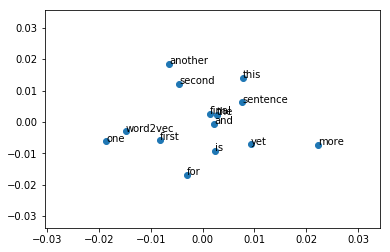

In [11]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

More information and practical applications: https://www.freecodecamp.org/news/how-to-get-started-with-word2vec-and-then-how-to-make-it-work-d0a2fca9dad3/